## Simulate full run

Estimation of the total time for the full run with all votable

In [22]:
using  Statistics , StatsBase
using  DataFrames, Printf , CSV , Query
using  Dates, Glob

import PyPlot


## directory
rootdir = ENV["GAIA_ROOT"]
wdir    = "$rootdir/products"
votdir  = "$wdir/votable.2019"
plotdir = "$wdir/test"
ocdir   = "$wdir/octest"
sclist  = "$rootdir/e2e_products/sc-list-2020.csv"

push!(LOAD_PATH,"$rootdir/master/src")
using GaiaClustering

cd(wdir)

In [23]:
fileres= "nstars_votable.2000pc.csv"
res= CSV.read(fileres, delim=";")

,votname,nstar
,String,Int64
1,AH03 J0822-36.4-2.0deg.vot,69725
2,ASCC 100-3.6deg.vot,189410
3,ASCC 102-2.0deg.vot,89069
4,ASCC 103-2.8deg.vot,164444
5,ASCC 105-4.7deg.vot,542912
6,ASCC 106-5.2deg.vot,434668
7,ASCC 107-2.0deg.vot,98937
8,ASCC 108-2.0deg.vot,89650
9,ASCC 109-3.4deg.vot,296474


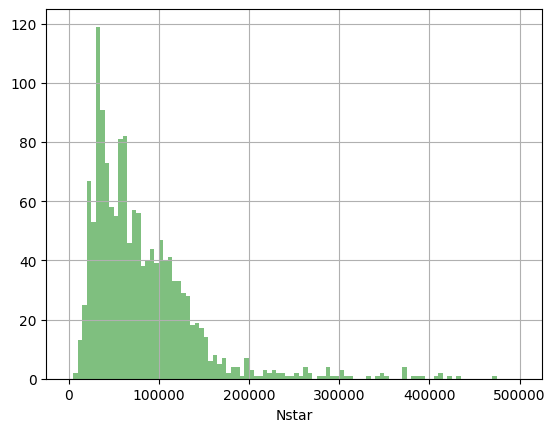

In [24]:
ax= PyPlot.subplot(111)
PyPlot.grid("on")
PyPlot.xlabel("Nstar")
PyPlot.hist(res.nstar, 100, range=[0, 5e5], density=false, facecolor="g", alpha= 0.5)

PyPlot.show()

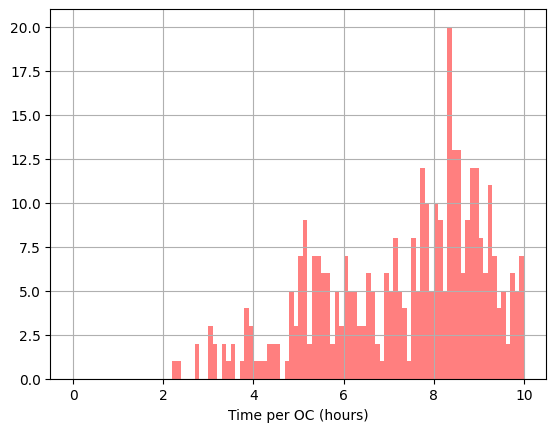

## Total Nstar: 1.32e+08 stars 
## Total Time : 1374.847 days 


In [25]:
## Estimation of the total time

timeperchainstar= 3e-5
maxiteration= 1e5
chain= 10000
ncore= 1
cyclemax= 3.0

totstar= sum(res.nstar)
totime= cyclemax * sum( chain*timeperchainstar .* res.nstar ) / (ncore * 3600 * 24)  ## days
timeperoc= (cyclemax*chain*timeperchainstar .* res.nstar ) / (ncore * 3600)           ## hours

@printf("## Total Nstar: %5.4g stars \n",totstar)
@printf("## Total Time : %3.3f days \n",totime)


ax= PyPlot.subplot(111)
PyPlot.grid("on")
PyPlot.xlabel("Time per OC (hours)")
PyPlot.hist(timeperoc, 100, range=[0, 10], density=false, facecolor="r", alpha= 0.5)

PyPlot.show()